In [103]:
import os
import pandas as pd


results = {} 
print(os.getcwd())
nameForCsv = os.getcwd().split("/")[5] + "-" + os.getcwd().split("/")[6] 

dirFiles = os.listdir(".")
dirFiles.sort()
for filename in dirFiles:
    listTestFailed = []     
    inside = 0
    if 'resultatStatu' in filename:

        with open(filename, 'r') as file:
            lines = file.readlines()
            last_lines = lines[-23:]
            for line in last_lines:
                
                if(inside == 1 and '------' not in line):
                    splitted = line.split()
                    testNumber = splitted[0]
                    testName = splitted[1].replace(",","")
                    string = testNumber + ":" + testName
                    if not (string in listTestFailed):
                        listTestFailed.append(string)
                if(('-------' in line) and inside == 0):
                    inside = 1
                    
                elif(('-------' in line) and inside == 1):
                    inside = 0
                    break
                
        results[filename[-17:]] = listTestFailed
    


#This line going to fail if MT status has failed more than the columns number tests in Big Crush. 
#You can had or remove column a,b,c,d,e,f,g,...
df = pd.DataFrame.from_dict(results, columns=["a","b","c","d","e"] , orient='index')
df.index.name = 'File name'

df = df.sort_index()
print(df)
print("#################")

dfGoodStatus = df.loc[(df["c"].isnull())] 
dfGoodStatus = dfGoodStatus.sort_index()
print(dfGoodStatus)
dfGoodStatus.to_csv("goodStatus"+nameForCsv+".csv")
print("#################")

dfBadStatus = df.loc[(df["c"].notnull())] 
dfBadStatus = dfBadStatus.sort_index()
print(dfBadStatus)
dfBadStatus.to_csv("badStatus"+nameForCsv+".csv")
print("#################")
print(dfBadStatus.query("a == b"))
print(dfBadStatus.query("b == c"))
print(dfBadStatus.query("c == d"))
print(dfBadStatus.query("d == e"))

nb3FailedTest = len(dfBadStatus[dfBadStatus["d"].isnull()]) 

nb4FailedTest = len(dfBadStatus[dfBadStatus["e"].isnull() & dfBadStatus["d"].notnull()] ) 

nb5FailedTest = len(dfBadStatus[dfBadStatus["e"].notnull()])

print("Number of status that failed 3 tests : " + str(nb3FailedTest))
print("Number of status that failed 4 tests : " + str(nb4FailedTest))
print("Number of status that failed 5 tests : " + str(nb5FailedTest))

countAcolumn = dfBadStatus["a"].value_counts().reset_index()
countAcolumn.columns = ["testName","count"] 
countBcolumn = dfBadStatus["b"].value_counts().reset_index()
countBcolumn.columns = ["testName","count"] 
countCcolumn = dfBadStatus["c"].value_counts().reset_index()
countCcolumn.columns = ["testName","count"] 
countDcolumn = dfBadStatus["d"].value_counts().reset_index()
countDcolumn.columns = ["testName","count"] 
countEcolumn = dfBadStatus["e"].value_counts().reset_index()
countEcolumn.columns = ["testName","count"] 

print(countAcolumn)
print(countBcolumn)
print(countCcolumn)
print(countDcolumn)
print(countEcolumn)

print("###################################")

dfCount = pd.concat([countAcolumn,countBcolumn,countCcolumn,countDcolumn,countEcolumn]).groupby(["testName"]).sum().reset_index()
print(dfCount.to_string())
dfCount.to_csv("dfCount"+nameForCsv+".csv")

print(dfCount.sort_values(by="count",ascending=False))
dfCount.sort_values(by="count",ascending=False).to_csv("dfCountDescending"+nameForCsv+".csv")

print(nameForCsv)
                

/home/local.isima.fr/beantunes/These/testU01-limos-ru01/SlurmSeqSplit
                                  a              b              c  \
File name                                                           
Mts000M000000.txt     22:ClosePairs  80:LinearComp  81:LinearComp   
Mts000M000001.txt     80:LinearComp  81:LinearComp           None   
Mts000M000002.txt    76:RandomWalk1  80:LinearComp  81:LinearComp   
Mts000M000003.txt     80:LinearComp  81:LinearComp    104:AutoCor   
Mts000M000004.txt  63:WeightDistrib  80:LinearComp  81:LinearComp   
...                             ...            ...            ...   
Mts000M004091.txt     80:LinearComp  81:LinearComp           None   
Mts000M004092.txt     22:ClosePairs  80:LinearComp  81:LinearComp   
Mts000M004093.txt     80:LinearComp  81:LinearComp           None   
Mts000M004094.txt  12:CollisionOver  80:LinearComp  81:LinearComp   
Mts000M004095.txt     80:LinearComp  81:LinearComp           None   

                                

/home/local.isima.fr/beantunes/These/testU01-limos-ru01/SlurmSeqSplit
                    count1
testName                  
81:LinearComp         1139
80:LinearComp         1139
74:RandomWalk1          63
11:CollisionOver        62
12:CollisionOver        52
...                    ...
5:CollisionOver          3
44:CollisionPermut       3
3:CollisionOver          2
6:CollisionOver          2
84:Fourier3              1

[106 rows x 1 columns]
                    count2
testName                  
81:LinearComp         1128
80:LinearComp         1128
11:CollisionOver        62
74:RandomWalk1          59
12:CollisionOver        52
...                    ...
44:CollisionPermut       3
5:CollisionOver          3
3:CollisionOver          2
6:CollisionOver          2
84:Fourier3              1

[106 rows x 1 columns]
                    count1  count2
testName                          
81:LinearComp         1139    1128
80:LinearComp         1139    1128
74:RandomWalk1          63      59
11:Co

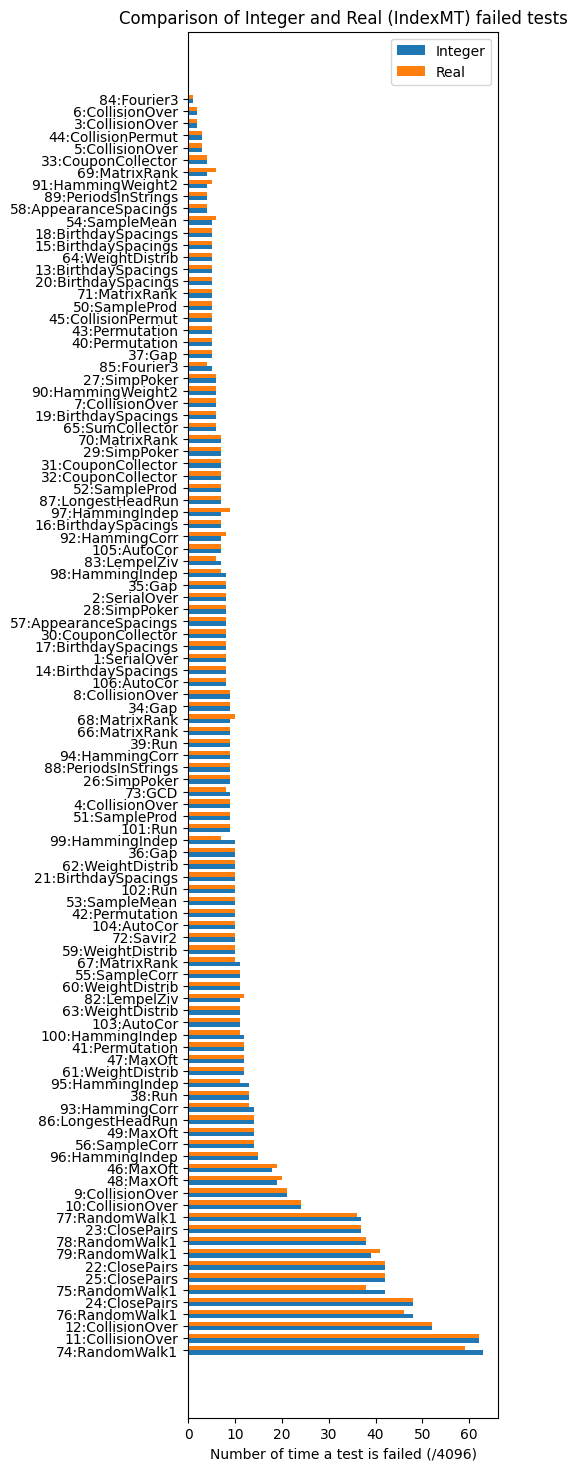

                    count1  count2  percentage1  percentage2
testName                                                    
74:RandomWalk1          63      59         1.54         1.44
11:CollisionOver        62      62         1.51         1.51
12:CollisionOver        52      52         1.27         1.27
76:RandomWalk1          48      46         1.17         1.12
24:ClosePairs           48      48         1.17         1.17
...                    ...     ...          ...          ...
5:CollisionOver          3       3         0.07         0.07
44:CollisionPermut       3       3         0.07         0.07
3:CollisionOver          2       2         0.05         0.05
6:CollisionOver          2       2         0.05         0.05
84:Fourier3              1       1         0.02         0.02

[104 rows x 4 columns]
                     count1
testName                   
81:LinearComp          1156
80:LinearComp          1156
12:CollisionOver         68
11:CollisionOver         57
22:ClosePairs  

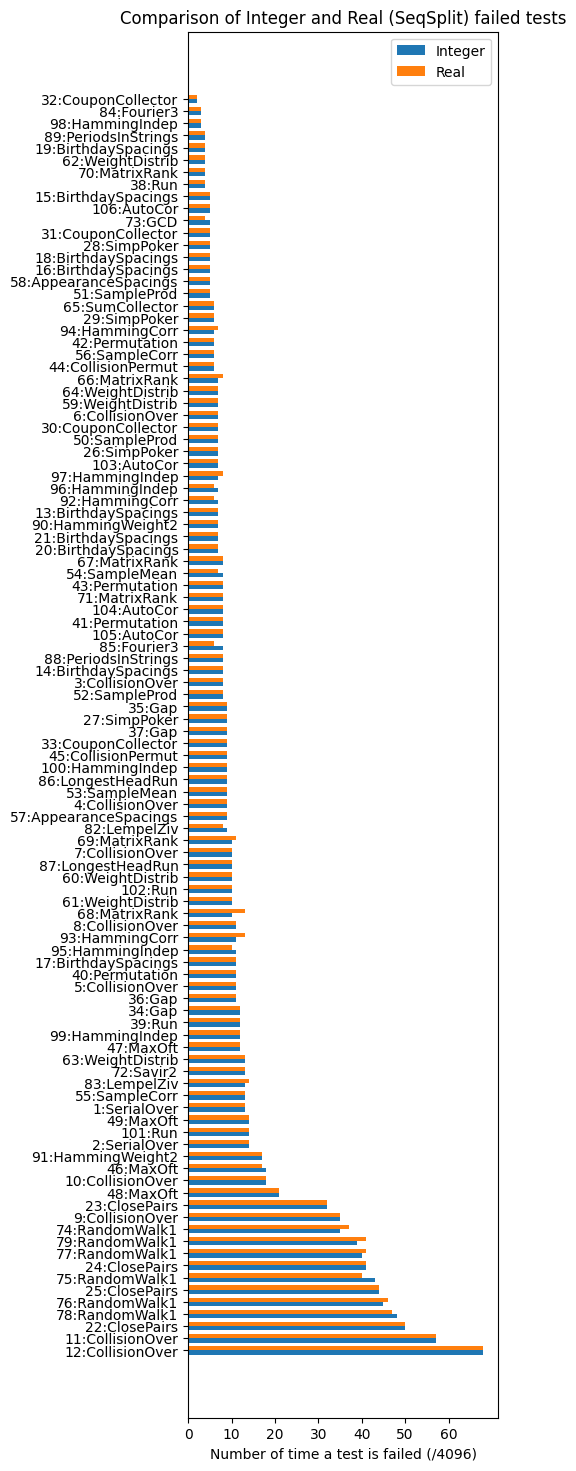

                     count1  count2  percentage1  percentage2
testName                                                     
12:CollisionOver         68      68         1.66         1.66
11:CollisionOver         57      57         1.39         1.39
22:ClosePairs            50      50         1.22         1.22
78:RandomWalk1           48      47         1.17         1.15
76:RandomWalk1           45      46         1.10         1.12
...                     ...     ...          ...          ...
19:BirthdaySpacings       4       4         0.10         0.10
89:PeriodsInStrings       4       4         0.10         0.10
98:HammingIndep           3       3         0.07         0.07
84:Fourier3               3       3         0.07         0.07
32:CouponCollector        2       2         0.05         0.05

[104 rows x 4 columns]
                     count1
testName                   
80:LinearComp          1185
81:LinearComp          1185
12:CollisionOver         69
11:CollisionOver         58
23

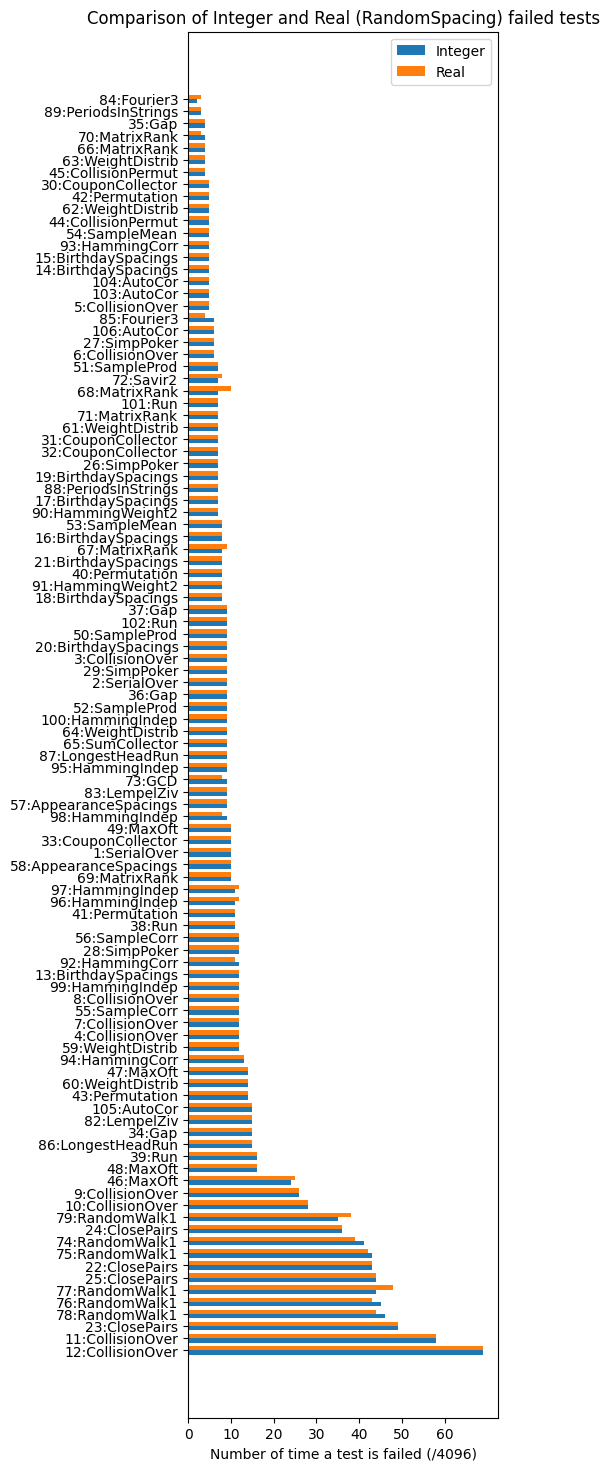

Le nb de bad status integer pour Random Spacing est de : 1185
Le nb de bad status real pour Random Spacing est de : 1185
                     count1  count2  percentage1  percentage2
testName                                                     
12:CollisionOver         69      69         1.68         1.68
11:CollisionOver         58      58         1.42         1.42
23:ClosePairs            49      49         1.20         1.20
78:RandomWalk1           46      44         1.12         1.07
76:RandomWalk1           45      43         1.10         1.05
...                     ...     ...          ...          ...
66:MatrixRank             4       4         0.10         0.10
70:MatrixRank             4       3         0.10         0.07
35:Gap                    4       4         0.10         0.10
89:PeriodsInStrings       3       3         0.07         0.07
84:Fourier3               2       3         0.05         0.07

[104 rows x 4 columns]


In [130]:
##### Etape statistique

###1st : Table of number of failed test
###2nd : Histogram of failed tests count for real vs integer

import matplotlib.pyplot as plt
import matplotlib



print(os.getcwd())
dirFiles = os.listdir("../../")



dfCountInteger = pd.read_csv("../../testU01-limos-nodes/SlurmIndexSeq/dfCountDescendingtestU01-limos-nodes-SlurmIndexSeq.csv")
dfCountReal = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmIndexSeq/dfCountDescendingtestU01-limos-nodesRealInterval-SlurmIndexSeq.csv")

dfBadStatusInteger = pd.read_csv("../../testU01-limos-nodes/SlurmIndexSeq/badStatustestU01-limos-nodes-SlurmIndexSeq.csv")
dfBadStatusReal = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmIndexSeq/badStatustestU01-limos-nodesRealInterval-SlurmIndexSeq.csv")

dfCountInteger = dfCountInteger.drop(columns=["Unnamed: 0"])
dfCountInteger.set_index("testName", inplace=True)
dfCountInteger.rename(columns={"count" : "count1"}, inplace=True)
print(dfCountInteger)

dfCountReal = dfCountReal.drop(columns=["Unnamed: 0"])
dfCountReal.set_index("testName", inplace=True)
dfCountReal.rename(columns={"count" : "count2"}, inplace=True)
print(dfCountReal)

dfMerge = pd.concat([dfCountInteger,dfCountReal], axis=1)

print(dfMerge)

dfMerge.to_csv("dfMergeRealVsInt-IndexSeq.csv")

dfMerge = dfMerge.iloc[2:]

print(dfMerge)


x = dfMerge.index.values.tolist()
y1 = dfMerge["count1"].tolist()
y2 = dfMerge["count2"].tolist()
# plt.hist(x,y1,y2)

# Set the width of the bars
bar_width = 0.35

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(4,18))

# Set the X-axis labels
ax.set_yticks([i + bar_width/2 for i in range(len(x))])
ax.set_yticklabels(x)

# Create the bars for y1 and y2
bars1 = ax.barh(range(len(y1)), y1, bar_width, label='Integer')
bars2 = ax.barh([i + bar_width for i in range(len(y2))], y2, bar_width, label='Real')

# Add the legend
ax.legend()

# Add axis labels and a title
ax.set_xlabel('Number of time a test is failed (/4096)')
ax.set_title('Comparison of Integer and Real (IndexMT) failed tests')


# Set the tick labels on the Y-axis
xticks = [i for i in range(0,70,10)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)


plt.savefig("dfMergeRealVsInt-IndexSeq.png",bbox_inches='tight')
# Show the plot
plt.show()




dfMerge["percentage1"] = round(dfMerge["count1"]/4096 * 100,2)
dfMerge["percentage2"] = round(dfMerge["count2"]/4096 * 100,2)

print(dfMerge)

dfMerge.to_csv("dfMergePercentageIndexSeq.csv")

######################################### 
######################################### 
######################################### 
######################################### 
######################################### 
######################################### 
######################################### 

dfCountInteger = pd.read_csv("../../testU01-limos-nodes/SlurmSeqSplit/dfCountDescendingtestU01-limos-nodes-SlurmSeqSplit.csv")
dfCountReal = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmSeqSplit/dfCountDescendingtestU01-limos-nodesRealInterval-SlurmSeqSplit.csv")

dfBadStatusInteger = pd.read_csv("../../testU01-limos-nodes/SlurmSeqSplit/badStatustestU01-limos-nodes-SlurmSeqSplit.csv")
dfBadStatusReal = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmSeqSplit/badStatustestU01-limos-nodesRealInterval-SlurmSeqSplit.csv")

dfCountInteger = dfCountInteger.drop(columns=["Unnamed: 0"])
dfCountInteger.set_index("testName", inplace=True)
dfCountInteger.rename(columns={"count" : "count1"}, inplace=True)
print(dfCountInteger)

dfCountReal = dfCountReal.drop(columns=["Unnamed: 0"])
dfCountReal.set_index("testName", inplace=True)
dfCountReal.rename(columns={"count" : "count2"}, inplace=True)
print(dfCountReal)

dfMerge = pd.concat([dfCountInteger,dfCountReal], axis=1)

print(dfMerge)

dfMerge.to_csv("dfMergeRealVsInt-SeqSplit.csv")


dfMerge = dfMerge.iloc[2:]


x = dfMerge.index.values.tolist()
y1 = dfMerge["count1"].tolist()
y2 = dfMerge["count2"].tolist()
# plt.hist(x,y1,y2)

# Set the width of the bars
bar_width = 0.35

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(4,18))

# Set the X-axis labels
ax.set_yticks([i + bar_width/2 for i in range(len(x))])
ax.set_yticklabels(x)

# Create the bars for y1 and y2
bars1 = ax.barh(range(len(y1)), y1, bar_width, label='Integer')
bars2 = ax.barh([i + bar_width for i in range(len(y2))], y2, bar_width, label='Real')

# Add the legend
ax.legend()

# Add axis labels and a title
ax.set_xlabel('Number of time a test is failed (/4096)')
ax.set_title('Comparison of Integer and Real (SeqSplit) failed tests')


# Set the tick labels on the Y-axis
xticks = [i for i in range(0,70,10)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

plt.savefig("dfMergeRealVsInt-SeqSplit.png",bbox_inches='tight')

# Show the plot
plt.show()


dfMerge["percentage1"] = round(dfMerge["count1"]/4096 * 100,2)
dfMerge["percentage2"] = round(dfMerge["count2"]/4096 * 100,2)

print(dfMerge)

dfMerge.to_csv("dfMergePercentageSeqSplit.csv")

######################################### 
######################################### 
######################################### 
######################################### 
######################################### 
######################################### 
#########################################

dfCountInteger = pd.read_csv("../../testU01-limos-nodes/SlurmRandomSpacingGood/SlurmRandomSpacing/dfCountDescendingtestU01-limos-nodes-SlurmRandomSpacingGood.csv")
dfCountReal = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmRandomSpacingGood/dfCountDescendingtestU01-limos-nodesRealInterval-SlurmRandomSpacingGood.csv")

dfBadStatusInteger = pd.read_csv("../../testU01-limos-nodes/SlurmRandomSpacingGood/SlurmRandomSpacing/badStatustestU01-limos-nodes-SlurmRandomSpacingGood.csv")
dfBadStatusReal = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmRandomSpacingGood/badStatustestU01-limos-nodesRealInterval-SlurmRandomSpacingGood.csv")


dfCountInteger = dfCountInteger.drop(columns=["Unnamed: 0"])
dfCountInteger.set_index("testName", inplace=True)
dfCountInteger.rename(columns={"count" : "count1"}, inplace=True)
print(dfCountInteger)

dfCountReal = dfCountReal.drop(columns=["Unnamed: 0"])
dfCountReal.set_index("testName", inplace=True)
dfCountReal.rename(columns={"count" : "count2"}, inplace=True)
print(dfCountReal)

dfMerge = pd.concat([dfCountInteger,dfCountReal], axis=1)

print(dfMerge.to_string())

dfMerge.to_csv("dfMergeRealVsInt-RandomSpacing.csv")


dfMerge = dfMerge.iloc[2:]

x = dfMerge.index.values.tolist()
y1 = dfMerge["count1"].tolist()
y2 = dfMerge["count2"].tolist()
# plt.hist(x,y1,y2)

# Set the width of the bars
bar_width = 0.35

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(4,18))

# Set the X-axis labels
ax.set_yticks([i + bar_width/2 for i in range(len(x))])
ax.set_yticklabels(x)

# Create the bars for y1 and y2
bars1 = ax.barh(range(len(y1)), y1, bar_width, label='Integer')
bars2 = ax.barh([i + bar_width for i in range(len(y2))], y2, bar_width, label='Real')

# Add the legend
ax.legend()

# Add axis labels and a title
ax.set_xlabel('Number of time a test is failed (/4096)')
ax.set_title('Comparison of Integer and Real (RandomSpacing) failed tests')

# Set the tick labels on the Y-axis
xticks = [i for i in range(0,70,10)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)


plt.savefig("dfMergeRealVsInt-RandomSpacing.png",bbox_inches='tight')
# Show the plot
plt.show()


print("Le nb de bad status integer pour Random Spacing est de : "+str(len(dfBadStatusInteger.index)))

print("Le nb de bad status real pour Random Spacing est de : "+str(len(dfBadStatusReal.index)))

dfMerge["percentage1"] = round(dfMerge["count1"]/4096 * 100,2)
dfMerge["percentage2"] = round(dfMerge["count2"]/4096 * 100,2)

print(dfMerge)

dfMerge.to_csv("dfMergePercentageRandomSpacing.csv")


/home/local.isima.fr/beantunes/These/testU01-limos-ru01/SlurmSeqSplit
                    countIndex
testName                      
81:LinearComp             1139
80:LinearComp             1139
74:RandomWalk1              63
11:CollisionOver            62
12:CollisionOver            52
...                        ...
5:CollisionOver              3
44:CollisionPermut           3
3:CollisionOver              2
6:CollisionOver              2
84:Fourier3                  1

[106 rows x 1 columns]
                     countRandom
testName                        
80:LinearComp               1185
81:LinearComp               1185
12:CollisionOver              69
11:CollisionOver              58
23:ClosePairs                 49
...                          ...
66:MatrixRank                  4
70:MatrixRank                  4
35:Gap                         4
89:PeriodsInStrings            3
84:Fourier3                    2

[106 rows x 1 columns]
                     countSeqSplit
testName       

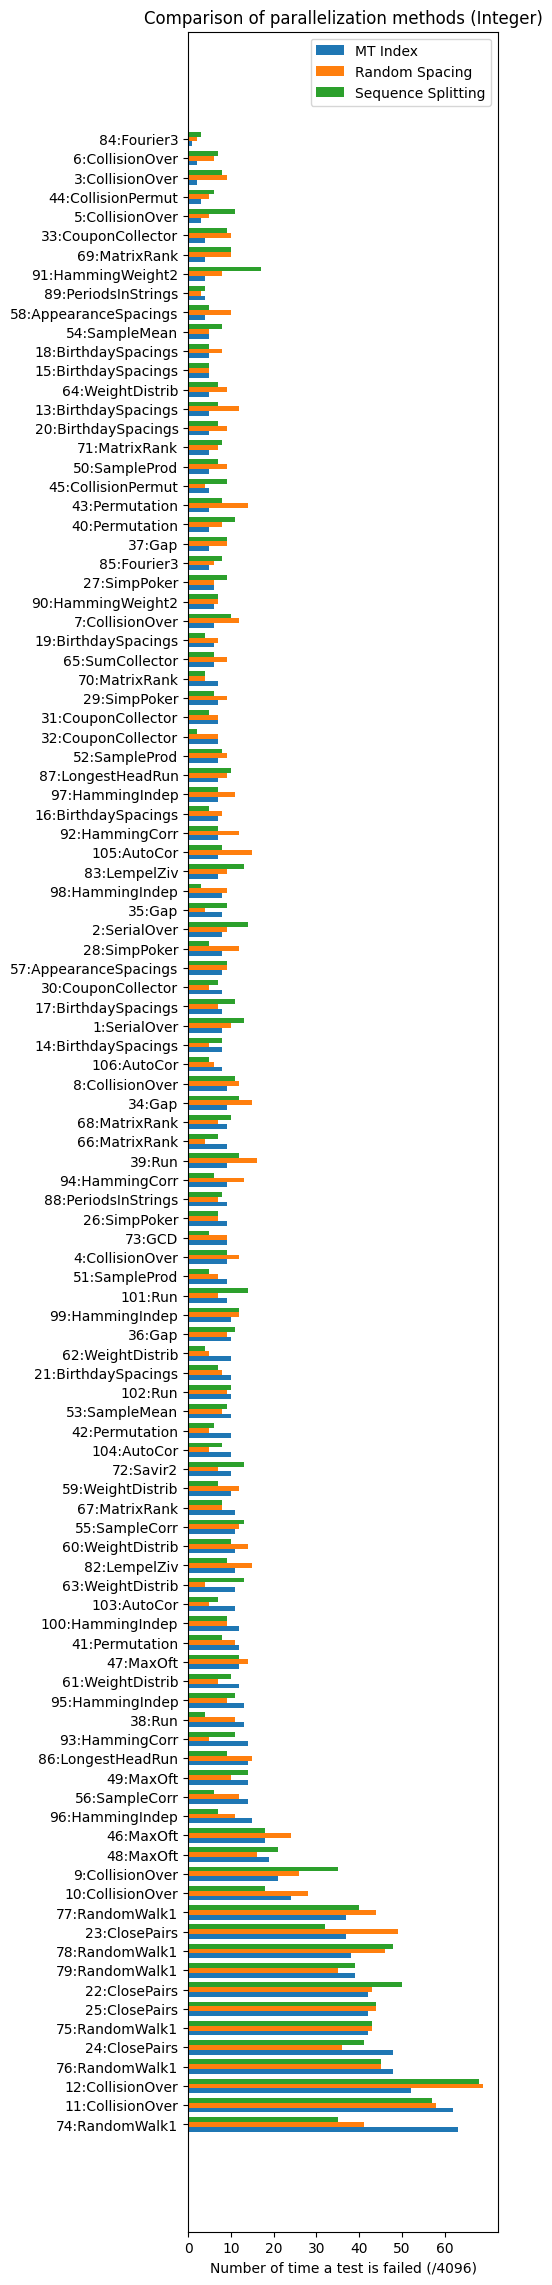

                    countIndex  countRandom  countSeqSplit  PercentageIndex  \
testName                                                                      
74:RandomWalk1              63           41             35             1.54   
11:CollisionOver            62           58             57             1.51   
12:CollisionOver            52           69             68             1.27   
76:RandomWalk1              48           45             45             1.17   
24:ClosePairs               48           36             41             1.17   
...                        ...          ...            ...              ...   
5:CollisionOver              3            5             11             0.07   
44:CollisionPermut           3            5              6             0.07   
3:CollisionOver              2            9              8             0.05   
6:CollisionOver              2            6              7             0.05   
84:Fourier3                  1            2         

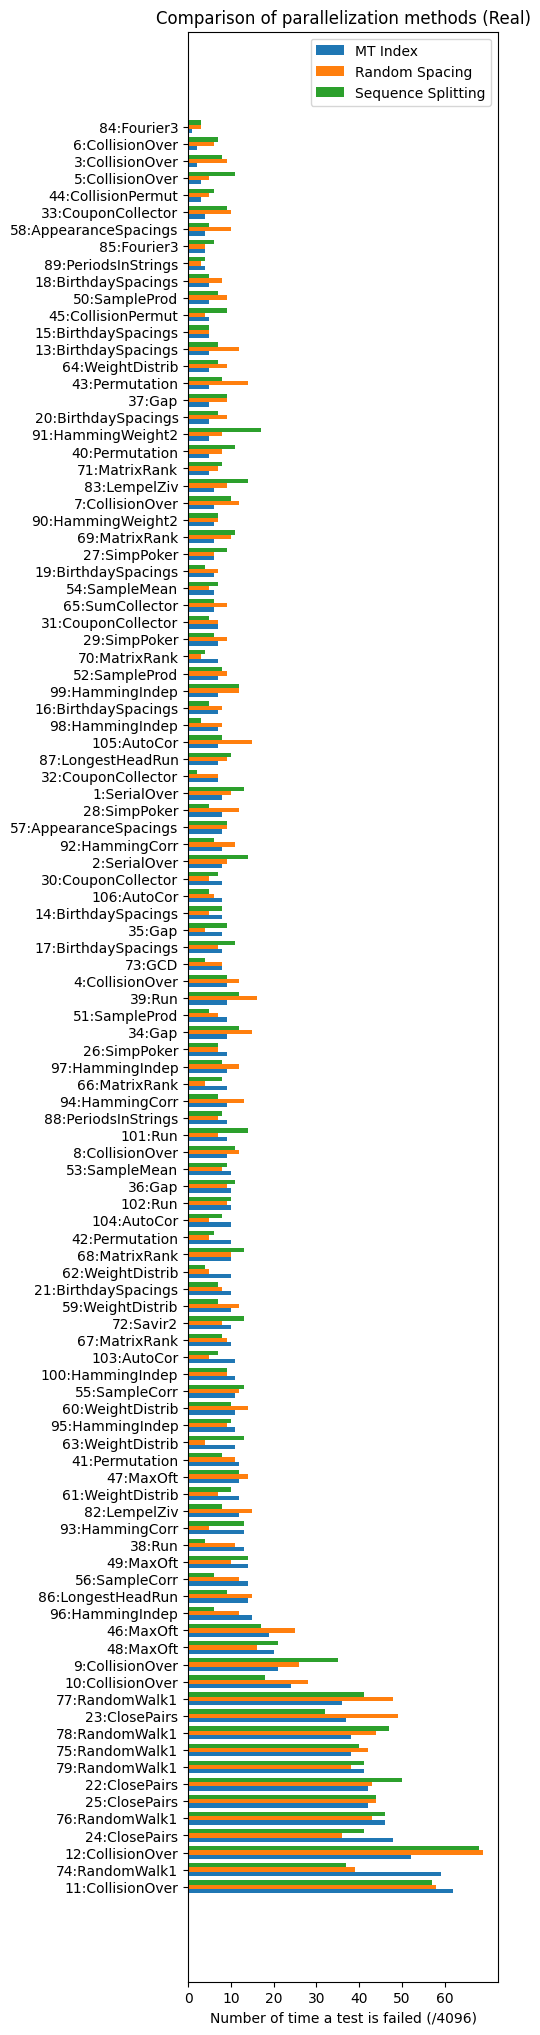

                    countIndex  countRandom  countSeqSplit  PercentageIndex  \
testName                                                                      
11:CollisionOver            62           58             57             1.51   
74:RandomWalk1              59           39             37             1.44   
12:CollisionOver            52           69             68             1.27   
24:ClosePairs               48           36             41             1.17   
76:RandomWalk1              46           43             46             1.12   
...                        ...          ...            ...              ...   
44:CollisionPermut           3            5              6             0.07   
5:CollisionOver              3            5             11             0.07   
3:CollisionOver              2            9              8             0.05   
6:CollisionOver              2            6              7             0.05   
84:Fourier3                  1            3         

In [133]:
##### Etape statistique

###1st : Table of number of failed test
###2nd : Histogram of failed tests count for real vs integer

import matplotlib.pyplot as plt
import matplotlib



print(os.getcwd())
dirFiles = os.listdir("../../")



dfCountIntegerIndexSeq = pd.read_csv("../../testU01-limos-nodes/SlurmIndexSeq/dfCountDescendingtestU01-limos-nodes-SlurmIndexSeq.csv")
dfCountRealIndexSeq = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmIndexSeq/dfCountDescendingtestU01-limos-nodesRealInterval-SlurmIndexSeq.csv")

dfBadStatusIntegerIndexSeq = pd.read_csv("../../testU01-limos-nodes/SlurmIndexSeq/badStatustestU01-limos-nodes-SlurmIndexSeq.csv")
dfBadStatusRealIndexSeq = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmIndexSeq/badStatustestU01-limos-nodesRealInterval-SlurmIndexSeq.csv")

dfCountIntegerRandom = pd.read_csv("../../testU01-limos-nodes/SlurmRandomSpacingGood/SlurmRandomSpacing/dfCountDescendingtestU01-limos-nodes-SlurmRandomSpacingGood.csv")
dfCountRealRandom = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmRandomSpacingGood/dfCountDescendingtestU01-limos-nodesRealInterval-SlurmRandomSpacingGood.csv")

dfBadStatusIntegerRandom = pd.read_csv("../../testU01-limos-nodes/SlurmRandomSpacingGood/SlurmRandomSpacing/badStatustestU01-limos-nodes-SlurmRandomSpacingGood.csv")
dfBadStatusRealRandom = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmRandomSpacingGood/badStatustestU01-limos-nodesRealInterval-SlurmRandomSpacingGood.csv")


dfCountIntegerSeqSplit = pd.read_csv("../../testU01-limos-nodes/SlurmSeqSplit/dfCountDescendingtestU01-limos-nodes-SlurmSeqSplit.csv")
dfCountRealSeqSplit = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmSeqSplit/dfCountDescendingtestU01-limos-nodesRealInterval-SlurmSeqSplit.csv")

dfBadStatusIntegerSeqSplit = pd.read_csv("../../testU01-limos-nodes/SlurmSeqSplit/badStatustestU01-limos-nodes-SlurmSeqSplit.csv")
dfBadStatusRealSeqSplit = pd.read_csv("../../testU01-limos-nodesRealInterval/SlurmSeqSplit/badStatustestU01-limos-nodesRealInterval-SlurmSeqSplit.csv")


dfCountIntegerIndexSeq = dfCountIntegerIndexSeq.drop(columns=["Unnamed: 0"])
dfCountIntegerIndexSeq.set_index("testName", inplace=True)
dfCountIntegerIndexSeq.rename(columns={"count" : "countIndex"}, inplace=True)
print(dfCountIntegerIndexSeq)

dfCountIntegerRandom = dfCountIntegerRandom.drop(columns=["Unnamed: 0"])
dfCountIntegerRandom.set_index("testName", inplace=True)
dfCountIntegerRandom.rename(columns={"count" : "countRandom"}, inplace=True)
print(dfCountIntegerRandom)

dfCountIntegerSeqSplit = dfCountIntegerSeqSplit.drop(columns=["Unnamed: 0"])
dfCountIntegerSeqSplit.set_index("testName", inplace=True)
dfCountIntegerSeqSplit.rename(columns={"count" : "countSeqSplit"}, inplace=True)
print(dfCountIntegerSeqSplit)


dfMerge = pd.concat([dfCountIntegerIndexSeq,dfCountIntegerRandom,dfCountIntegerSeqSplit], axis=1)

print(dfMerge)

dfMerge.to_csv("dfMergeParaComparisonInteger.csv")

dfMerge = dfMerge.iloc[2:]

print(dfMerge)


x = dfMerge.index.values.tolist()
y1 = dfMerge["countIndex"].tolist()
y2 = dfMerge["countRandom"].tolist()
y3 = dfMerge["countSeqSplit"].tolist()
# plt.hist(x,y1,y2)

# Set the width of the bars
bar_width = 0.25

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(4,25))

# Set the X-axis labels
ax.set_yticks([i + bar_width for i in range(len(x))])
ax.set_yticklabels(x)
plt.subplots_adjust(bottom=0)

# Create the bars for y1 and y2
bars1 = ax.barh(range(len(y1)), y1, bar_width, label='MT Index')
bars2 = ax.barh([i + bar_width for i in range(len(y2))], y2, bar_width, label='Random Spacing')
bars3 = ax.barh([i + (bar_width*2) for i in range(len(y3))], y3, bar_width, label='Sequence Splitting')

# Add the legend
ax.legend()

# Add axis labels and a title
ax.set_xlabel('Number of time a test is failed (/4096)')
ax.set_title('Comparison of parallelization methods (Integer)')


# Set the tick labels on the Y-axis
xticks = [i for i in range(0,70,10)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)


plt.savefig("dfMergeParaComparisonInteger.png",bbox_inches='tight')
# Show the plot
plt.show()



dfMerge["PercentageIndex"] = round(dfMerge["countIndex"]/4096 * 100,2)
dfMerge["PercentageRandom"] = round(dfMerge["countRandom"]/4096 * 100,2)
dfMerge["PercentageSeqSplit"] = round(dfMerge["countSeqSplit"]/4096 * 100,2)
print(dfMerge)

dfMerge.to_csv("dfMergePercentageInteger.csv")

#################################### 
####################################
####################################
####################################
####################################
####################################
####################################
####################################




dfCountRealIndexSeq = dfCountRealIndexSeq.drop(columns=["Unnamed: 0"])
dfCountRealIndexSeq.set_index("testName", inplace=True)
dfCountRealIndexSeq.rename(columns={"count" : "countIndex"}, inplace=True)
print(dfCountRealIndexSeq)

dfCountRealRandom = dfCountRealRandom.drop(columns=["Unnamed: 0"])
dfCountRealRandom.set_index("testName", inplace=True)
dfCountRealRandom.rename(columns={"count" : "countRandom"}, inplace=True)
print(dfCountRealRandom)

dfCountRealSeqSplit = dfCountRealSeqSplit.drop(columns=["Unnamed: 0"])
dfCountRealSeqSplit.set_index("testName", inplace=True)
dfCountRealSeqSplit.rename(columns={"count" : "countSeqSplit"}, inplace=True)
print(dfCountRealSeqSplit)


dfMerge = pd.concat([dfCountRealIndexSeq,dfCountRealRandom,dfCountRealSeqSplit], axis=1)

print(dfMerge)

dfMerge.to_csv("dfMergeParaComparisonReal.csv")

dfMerge = dfMerge.iloc[2:]

print(dfMerge)


x = dfMerge.index.values.tolist()
y1 = dfMerge["countIndex"].tolist()
y2 = dfMerge["countRandom"].tolist()
y3 = dfMerge["countSeqSplit"].tolist()
# plt.hist(x,y1,y2)

# Set the width of the bars
bar_width = 0.25

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(4,25))

# Set the X-axis labels
ax.set_yticks([i + bar_width for i in range(len(x))])
ax.set_yticklabels(x)
plt.subplots_adjust(bottom=0)

# Create the bars for y1 and y2
bars1 = ax.barh(range(len(y1)), y1, bar_width, label='MT Index')
bars2 = ax.barh([i + bar_width for i in range(len(y2))], y2, bar_width, label='Random Spacing')
bars3 = ax.barh([i + (bar_width*2) for i in range(len(y3))], y3, bar_width, label='Sequence Splitting')

# Add the legend
ax.legend()

# Add axis labels and a title
ax.set_xlabel('Number of time a test is failed (/4096)')
ax.set_title('Comparison of parallelization methods (Real)')


# Set the tick labels on the Y-axis
xticks = [i for i in range(0,70,10)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)


plt.savefig("dfMergeParaComparisonReal.png",bbox_inches='tight')
fig.subplots_adjust(bottom=0.1)
# Show the plot
plt.show()



dfMerge["PercentageIndex"] = round(dfMerge["countIndex"]/4096 * 100,2)
dfMerge["PercentageRandom"] = round(dfMerge["countRandom"]/4096 * 100,2)
dfMerge["PercentageSeqSplit"] = round(dfMerge["countSeqSplit"]/4096 * 100,2)
print(dfMerge)

dfMerge.to_csv("dfMergePercentageReal.csv")